In [65]:
# Importing packages

import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt 
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [66]:
# Loading datasets

X, y = load_boston(return_X_y=True)
print(f"No of data samples : {X.shape[0]}")

No of data samples : 506


In [67]:
# Spliting into training and testing datasets
M = 400                    # No. of samples in the training dataset
N = X.shape[0] - M         # No. of samples in the testing dataset
X_train, y_train = X[:M,:], y[:M]
X_test , y_test  = X[M:,:], y[M:]

In [68]:
# Reshape the data (sklearn is pedantic)
y_train, y_test = y_train[:, None], y_test[:, None]

In [69]:
# Normalize the data
scaler = StandardScaler() # To scale the X_train and X_test datasets

# Let's transform the X_train and X_test data
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [70]:
X_train = np.c_[np.ones_like(X_train[:, 0]) , X_train]
X_test  = np.c_[np.ones_like(X_test[:, 0])  , X_test ]

In [71]:
# Let's initialize our weights
w = np.random.randn(X_train.shape[-1], 1)

In [72]:
def loss(y, y_pred):
    return 0.5 * np.mean((y - y_pred) ** 2)

def loss_grad(X, y, y_pred):
    return (1./X.shape[0]) * X.T @ (y_pred - y)

In [73]:
# Start training now!
import time
import sys

epochs = 100
alpha  = 0.03
train_losses = []
test_losses  = []
for _ in range(epochs):
    y_pred = X_train @ w
    w_grad = loss_grad(X_train, y_train, y_pred)
    w = w - alpha * w_grad
    sys.stdout.write(f"\rEpochs : {_}, loss_train : {loss(y_train, y_pred):.4f}, loss_test : {loss(y_test, X_test @ w):.4f}")
    train_losses.append(loss(y_train, y_pred))
    test_losses.append(loss(y_test, X_test @ w))
    time.sleep(0.05)

Epochs : 99, loss_train : 13.5612, loss_test : 15.0852

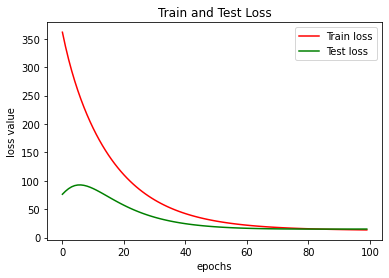

In [74]:
import matplotlib.pyplot as plt

plt.plot(train_losses, color='r', label="Train loss")
plt.plot(test_losses, color='g', label="Test loss")
plt.title("Train and Test Loss")
plt.xlabel("epochs")
plt.ylabel("loss value")
plt.legend()
plt.show()

For alpha 0.0001 :
	Theta: [[-0.39925526]
 [ 0.50000383]
 [ 2.07775593]
 [ 0.74895147]
 [ 0.58949543]
 [-0.25972503]
 [ 2.33375756]
 [-1.68370803]
 [ 0.42818343]
 [ 0.31342742]
 [ 0.01400306]
 [-0.53351756]
 [-1.20346038]
 [-0.00855802]]
	MAE: 15.18930152842787
	MSE: 299.6740767572498
For alpha 0.0003 :
	Theta: [[-0.35640997]
 [-0.48481105]
 [-0.64248745]
 [-1.46278109]
 [-0.43574326]
 [ 0.24613746]
 [-0.8418798 ]
 [ 1.43630306]
 [-1.0041252 ]
 [-0.26197713]
 [-0.55131567]
 [ 1.8752137 ]
 [-0.52610099]
 [-1.20843902]]
	MAE: 15.392293944333394
	MSE: 270.2328400596714
For alpha 0.001 :
	Theta: [[ 2.9952745 ]
 [-1.37389219]
 [ 2.5185879 ]
 [-0.81442255]
 [-0.1321475 ]
 [ 0.45778958]
 [-0.05785604]
 [ 0.39880353]
 [-0.5653267 ]
 [-0.77728479]
 [-0.74673891]
 [ 0.01382263]
 [ 0.14462914]
 [-0.10306591]]
	MAE: 19.74248159353918
	MSE: 413.2464491751797
For alpha 0.003 :
	Theta: [[ 6.36287451]
 [ 0.07990647]
 [ 0.12907113]
 [-0.90923247]
 [-1.46059024]
 [-1.06121614]
 [ 0.78492935]
 [-0.481126

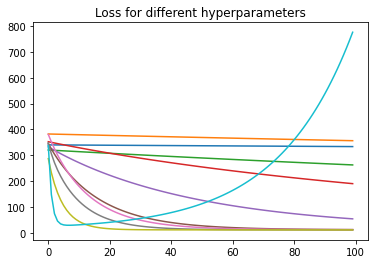

In [75]:
#for saving values for table generation 
thetas = []
MAEs = []
MSEs = []

epochs = 100
# alphas  = [0.01, 0.03, 0.05, 0.1, 0.37]
alphas  = [0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.037, 0.05, 0.1, 0.37]
for alpha in alphas:
    w = np.random.randn(X_train.shape[-1], 1)
    train_losses = []
    for _ in range(epochs):
        y_pred = X_train @ w
        w_grad = loss_grad(X_train, y_train, y_pred)
        w = w - alpha * w_grad
        train_losses.append(loss(y_train, y_pred))
#         test_losses.append(loss(y_test, X_test @ w))
    plt.plot(train_losses, label=f"$\\alpha$={alpha}")

    predictions=np.dot(X_test,w)
    print("For alpha",alpha,":")
    print("\tTheta:", w) 
    thetas.append(w)

    this_MAE = sklearn.metrics.mean_absolute_error(y_true=y_test,y_pred=predictions)
    print("\tMAE:", this_MAE) 
    MAEs.append(this_MAE)

    this_MSE = sklearn.metrics.mean_squared_error(y_true=y_test,y_pred=predictions)
    print("\tMSE:", this_MSE) 
    MSEs.append(this_MSE)
    
# plt.legend()
plt.title("Loss for different hyperparameters")
plt.show()

# Extra Lab work 
Plotting graph for 10 alpha values and calculating their MAE and MSE.
Also generating table of alpha values along with their respective theta values, MSE and MAB.

In [76]:
# Generating table of 10x17 for each of 10 alpha values in which parameters like MSE, MAE, 14 Theta values are included.
from prettytable import PrettyTable
myTable = PrettyTable(["Alpha values", "MAE", "MSE", "θ0", "θ1", "θ2", "θ3", "θ4", "θ5", "θ6", "θ7", "θ8", "θ9", "θ10", "θ11", "θ12", "θ13" ])

for i in range(len(alphas)):
  myTable.add_row([str(alphas[i]), str(MAEs[i]), str(MSEs[i]), str(thetas[i][0]), str(thetas[i][1]), str(thetas[i][2]), str(thetas[i][3]), str(thetas[i][4]), str(thetas[i][5]), str(thetas[i][6]), str(thetas[i][7]), str(thetas[i][8]), str(thetas[i][9]), str(thetas[i][10]), str(thetas[i][11]), str(thetas[i][12]), str(thetas[i][13])])
print(myTable)

+--------------+--------------------+--------------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+
| Alpha values |        MAE         |        MSE         |       θ0      |       θ1      |       θ2      |       θ3      |       θ4      |       θ5      |       θ6      |       θ7      |       θ8      |       θ9      |      θ10      |      θ11      |      θ12      |      θ13      |
+--------------+--------------------+--------------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+
|    0.0001    | 15.18930152842787  | 299.6740767572498  | [-0.39925526] |  [0.50000383] |  [2.07775593] |  [0.74895147] |  [0.58949543] | [-0.25972503

# Linear Regression using normal equation : 

In [77]:
import numpy as np
from sklearn import datasets, metrics
from numpy.linalg import inv, pinv, LinAlgError

X, y = datasets.load_boston(return_X_y=True)
X_train_temp1=X[0:400,:]
X_train=np.zeros((X_train_temp1.shape[0],X_train_temp1.shape[1]+1))
X_train[:,0]=np.ones((X_train_temp1.shape[0]))
X_train[:,1:]=X_train_temp1
print("Type of X_train:", type(X_train), "Shape of X_train:", X_train.shape)
y_train=y[0:400]
X_test_temp1=X[400:506,:]
X_test=np.zeros((X_test_temp1.shape[0],X_test_temp1.shape[1]+1))
X_test[:,0]=np.ones((X_test_temp1.shape[0]))
X_test[:,1:]=X_test_temp1
print("Type of X_test:", type(X_test), "Shape of X_test:", X_test.shape)
y_test=y[400:506]
theta=np.zeros(X_train.shape[1])
try:
  XTXi=inv(np.dot(X_train.T,X_train))
except LinAlgError:
  XTXi=pinv(np.dot(X_train.T,X_train))
XTy=np.dot(X_train.T,y_train)
theta=np.dot(XTXi,XTy)
print("Thetas:", theta)
print("Thetas Shape:", theta.shape)
predictions=np.dot(theta,X_test.T)
print("MAE:", metrics.mean_absolute_error(y_true=y_test,y_pred=predictions))
print("MSE:", metrics.mean_squared_error(y_true=y_test,y_pred=predictions))

Type of X_train: <class 'numpy.ndarray'> Shape of X_train: (400, 14)
Type of X_test: <class 'numpy.ndarray'> Shape of X_test: (106, 14)
Thetas: [ 2.86725996e+01 -1.91246374e-01  4.42289967e-02  5.52207977e-02
  1.71631351e+00 -1.49957220e+01  4.88773025e+00  2.60921031e-03
 -1.29480799e+00  4.84787214e-01 -1.54006673e-02 -8.08795026e-01
 -1.29230427e-03 -5.17953791e-01]
Thetas Shape: (14,)
MAE: 5.142232214464314
MSE: 37.89377859958516
